<a href="https://colab.research.google.com/github/Srishti013/Machine-Learning/blob/main/Unsupervised_Learning/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)
df 

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


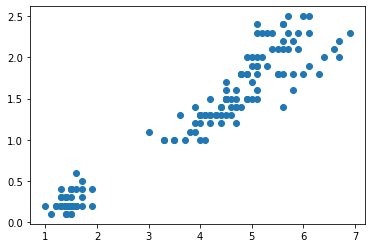

In [7]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

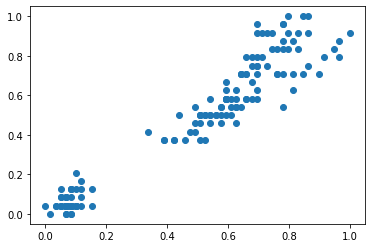

In [14]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [15]:
kr = range(1,10)
sse = []
for k in kr:
  model = KMeans(n_clusters=k)
  model.fit(df)
  sse.append(model.inertia_)

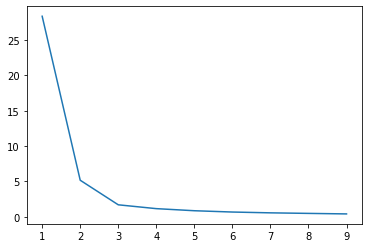

In [16]:
plt.plot(kr,sse)

In [18]:
model = KMeans(n_clusters=3)
model.fit(df)
predicted = model.predict(df)


In [22]:
df['cluster'] = predicted
df.cluster.unique()

array([1, 0, 2], dtype=int32)

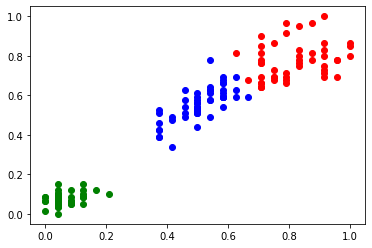

In [23]:
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
df3 = df[df['cluster']==0]
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color='green')
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],color='red')
plt.scatter(df3['petal width (cm)'],df3['petal length (cm)'],color='blue')

In [25]:
model = KMeans(n_clusters=2)
model.fit(df)
predicted = model.predict(df)
df['cluster'] = predicted

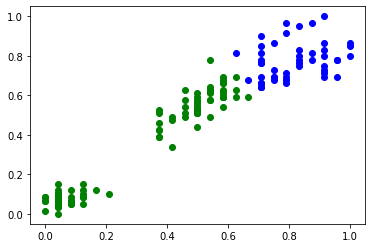

In [26]:
df1 = df[df['cluster']==1]
df3 = df[df['cluster']==0]
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color='green')
plt.scatter(df3['petal width (cm)'],df3['petal length (cm)'],color='blue')